In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

In [3]:
dfp = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Academic Performance of High School Students\High School Students Performance.csv")

In [4]:
dfp.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
dfp = dfp.drop(columns=['StudentID'])

In [6]:
dfp=dfp.drop(columns=['GradeClass'])

In [7]:
dfp['InTopGPA']=[1 if x >= 3 else 0 for x in dfp['GPA']]

In [8]:
dfp.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,InTopGPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


In [9]:
dfp.corr()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,InTopGPA
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,0.000617
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,-0.007334
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,0.001574
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,-0.004344
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,0.136096
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,-0.540213
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,0.134290
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,0.140736
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,0.073005
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,0.062882


In [10]:
dfpcorr = dfp.corr()

<Axes: >

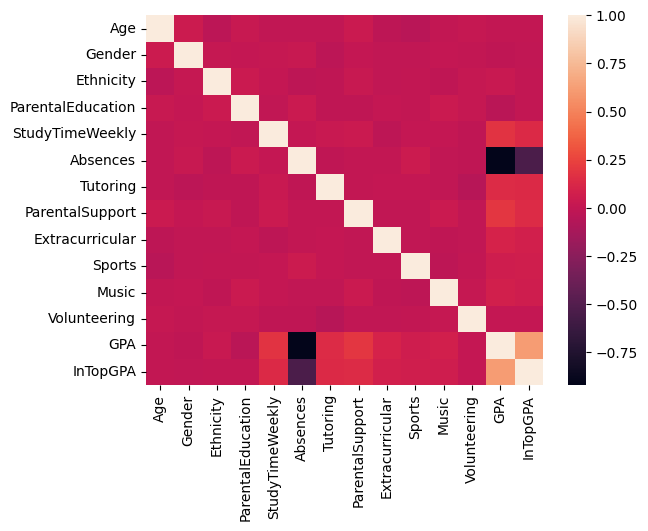

In [11]:
sns.heatmap(dfpcorr)

In [12]:
dfp.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'InTopGPA'],
      dtype='object')

In [13]:
dfp = dfp.drop(columns=['GPA',  'Tutoring', 'ParentalSupport', 'Extracurricular'])

In [14]:
X = dfp.drop(columns=['InTopGPA'])
y = dfp['InTopGPA']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_knn_pred = knn.predict(X_test)

In [18]:
accuracy_score(y_test, y_knn_pred)

0.9123173277661796

In [19]:
knn.score(X_test,y_test)

0.9123173277661796

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_clf_pred = clf.predict(X_test)

In [23]:
accuracy_score(y_test, y_clf_pred)

0.8977035490605428

In [24]:
forest = RandomForestClassifier()

In [25]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_forest_pred = forest.predict(X_test)

In [27]:
accuracy_score(y_test, y_forest_pred)

0.9144050104384134

In [28]:
hist = HistGradientBoostingClassifier()

In [29]:
hist.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [30]:
y_hist_pred = hist.predict(X_test)

In [31]:
accuracy_score(y_test, y_hist_pred)

0.9123173277661796